# Initial: Global Wheat Challenge

In [1]:
import numpy as np
import pandas as pd

from IPython import display
from IPython.display import Image
import matplotlib.pyplot as plt # plotting
import matplotlib.patches as patches

In [2]:
import PIL
import PIL.Image
import pathlib

In [3]:
#pip install tdqm

In [4]:
pip show tqdm

Name: tqdm
Version: 4.62.3
Summary: Fast, Extensible Progress Meter
Home-page: https://tqdm.github.io
Author: None
Author-email: None
License: MPLv2.0, MIT Licences
Location: /Users/abigailmorgan/opt/anaconda3/lib/python3.8/site-packages
Requires: 
Required-by: thinc, tdqm, spacy, shap, prophet, pandas-profiling, nltk, kaggle, hyperopt, featuretools, conda-build
Note: you may need to restart the kernel to use updated packages.


In [5]:
from tqdm import tqdm 

#### Folders: 
* images

* competition_test.csv

* competition_train.csv

* competition_val.csv

* metadata_dataset.csv

<hr style="border:2px solid gray"> </hr>

In [6]:
metadata = pd.read_csv('gwhd_2021/metadata_dataset.csv', sep=';')

In [7]:
metadata.head()

,name,country,location,development_stage
0,Ethz_1,Switzerland,Usask,Filling
1,Rres_1,UK,Rothamsted,Filling - Ripening
2,ULiège-GxABT_1,Belgium,Gembloux,Ripening
3,NMBU_1,Norway,NMBU,Filling
4,NMBU_2,Norway,NMBU,Ripening


In [8]:
metadata.isna().sum()

name                 0
country              0
location             0
development_stage    0
dtype: int64

In [9]:
metadata.name.unique()

array(['Ethz_1', 'Rres_1', 'ULiège-GxABT_1', 'NMBU_1', 'NMBU_2',
       'Arvalis_1', 'Arvalis_2', 'Arvalis_3', 'Arvalis_4', 'Arvalis_5',
       'Arvalis_6', 'Arvalis_7', 'Arvalis_8', 'Arvalis_9', 'Arvalis_10',
       'Arvalis_11', 'Arvalis_12', 'Inrae_1', 'Usask_1', 'KSU_1', 'KSU_2',
       'KSU_3', 'KSU_4', 'Terraref_1', 'Terraref_2', 'CIMMYT_1',
       'CIMMYT_2', 'CIMMYT_3', 'Utokyo_1', 'Utokyo_2', 'Utokyo_3',
       'Ukyoto_1', 'NAU_1', 'NAU_2', 'NAU_3', 'UQ_1', 'UQ_2', 'UQ_3',
       'UQ_4', 'UQ_5', 'UQ_6', 'UQ_7', 'UQ_8', 'UQ_9', 'UQ_10', 'UQ_11',
       'ARC_1'], dtype=object)

In [10]:
metadata.country.unique()

array(['Switzerland', 'UK', 'Belgium', 'Norway', 'France', 'Canada', 'US',
       'Mexico', 'Japan', 'China', 'Australia', 'Sudan'], dtype=object)

In [11]:
metadata.location.unique()

array(['Usask', 'Rothamsted', 'Gembloux', 'NMBU', 'Gréoux', 'VLB', 'VSC',
       'Mons', 'Toulouse', 'Saskatchewan', 'KSU', 'Maricopa,AZ',
       ' Maricopa,AZ', 'Ciudad Obregon', 'NARO-Tsukuba', 'NARO-Hokkaido',
       'Kyoto', 'Baima', 'Gatton', 'McAllister', 'Brookstead',
       'Wad Medani'], dtype=object)

In [12]:
metadata.development_stage.unique()

array(['Filling', 'Filling - Ripening', 'Ripening', 'Post-flowering',
       'multiple', 'Post-Flowering'], dtype=object)

<hr style="border:2px solid gray"> </hr>

In [13]:
test = pd.read_csv('gwhd_2021/competition_test.csv')

In [14]:
test.isna().sum()

image_name     0
BoxesString    0
domain         0
dtype: int64

In [15]:
test

,image_name,BoxesString,domain
0,255b6ca9fea63f44125e5174bc932470b604c760430715...,481 820 604 922;655 957 732 1024;930 926 1013 ...,UQ_7
1,7f5eb37cab658de6fd0d688bf27f16e423794fed6184d8...,896 911 977 955;800 898 821 941;770 867 804 90...,UQ_7
2,7bcfff43b356f4a94948367782aa704a37ff4579baf45d...,892 993 922 1024;844 943 871 965;758 926 801 9...,UQ_7
3,e535384eda9d0f9c6ac57dd9397d5d614e4cad48c144d8...,648 886 722 1024;392 950 507 1024;876 677 981 ...,UQ_7
4,66e9fa7379fd7b7fd64024ac1b03b8e56f9ad020c10635...,559 939 623 1009;775 875 829 919;853 883 888 9...,UQ_7
...,...,...,...
1377,36064fc36d5d54025c3bafcb0e061cc81347389cc85927...,88 315 166 477;242 506 288 641;131 622 180 752...,ARC_1
1378,92e363996758d6261726abf33f7555b4f1503306b19887...,179 420 230 497;65 379 134 422;114 281 173 358...,ARC_1
1379,982dfbbc5b5eca9017fe407b9befdd3e709600ce9ae446...,81 161 182 302;235 199 365 289;0 290 111 413;4...,ARC_1
1380,385345ab4b25350b8f2fc7ab86b258271dd35b5558b4ab...,539 636 774 711;439 732 599 865;635 847 892 94...,ARC_1


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_name   1382 non-null   object
 1   BoxesString  1382 non-null   object
 2   domain       1382 non-null   object
dtypes: object(3)
memory usage: 32.5+ KB


In [17]:
len(test.image_name.unique())

1381

$\star$ Change `image_name` string to read `.jpg` instead of `.png` (the correct image format):

In [18]:
for i, row in test.iterrows():
    row['image_name'] = (row.image_name.split('.')[0]+'.jpg')

In [19]:
test.image_name[0]

'255b6ca9fea63f44125e5174bc932470b604c76043071522ba0ef63abb1a544b.jpg'

<hr style="border:2px solid gray"> </hr>

In [20]:
train = pd.read_csv('gwhd_2021/competition_train.csv')

In [21]:
train.isna().sum()

image_name     0
BoxesString    0
domain         0
dtype: int64

In [22]:
train.head()

,image_name,BoxesString,domain
0,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1
1,a2a15938845d9812de03bd44799c4b1bf856a8ad11752e...,230 143 321 222;928 929 1015 1004;485 557 604 ...,Arvalis_1
2,401f89a2bb6ab63e3f406bd59b9cadccfe953230feb6cd...,440 239 544 288;333 538 429 594;913 171 963 20...,Arvalis_1
3,0a3937653483c36dfb4d957b6f82ae96dbdc7ba36cc3d8...,112 274 188 303;892 812 958 847;0 889 67 928;1...,Arvalis_1
4,be1652110a44acd24b42784356e965ce84a04893c3f1bb...,810 204 863 314;360 231 425 408;452 348 510 47...,Arvalis_1


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_name   3657 non-null   object
 1   BoxesString  3657 non-null   object
 2   domain       3657 non-null   object
dtypes: object(3)
memory usage: 85.8+ KB


In [24]:
len(train.image_name.unique())

3655

In [25]:
train[train.duplicated()]

,image_name,BoxesString,domain


In [26]:
train.image_name[train.image_name.duplicated()]

2070    d88963636d49127bda0597ef73f1703e92d6f111caefc4...
2079    1961bcf453d5b2206c428c1c14fe55d1f26f3c655db0a2...
Name: image_name, dtype: object

In [27]:
dupes = train.sort_values("image_name")
dupes[dupes.duplicated()]

,image_name,BoxesString,domain


In [28]:
train['image_name'].iloc[2070]

'd88963636d49127bda0597ef73f1703e92d6f111caefc44902d5932b8cd3fa94.png'

In [29]:
train['image_name'].iloc[2079]

'1961bcf453d5b2206c428c1c14fe55d1f26f3c655db0a2b6a83094476e8edb5b.png'

In [30]:
train.iloc[2070]

image_name     d88963636d49127bda0597ef73f1703e92d6f111caefc4...
BoxesString    312 994 364 1024;177 756 296 869;88 118 147 17...
domain                                                Arvalis_12
Name: 2070, dtype: object

In [31]:
train.iloc[2079]

image_name     1961bcf453d5b2206c428c1c14fe55d1f26f3c655db0a2...
BoxesString    3 944 58 985;876 506 919 555;770 859 834 903;9...
domain                                                Arvalis_12
Name: 2079, dtype: object

In [32]:
train[train.image_name == '1961bcf453d5b2206c428c1c14fe55d1f26f3c655db0a2b6a83094476e8edb5b.jpg']

,image_name,BoxesString,domain


In [33]:
train[train.image_name == 'd88963636d49127bda0597ef73f1703e92d6f111caefc44902d5932b8cd3fa94.jpg']

,image_name,BoxesString,domain


$\star$ Change `image_name` string to read `.jpg` instead of `.png` (the correct image format):

In [34]:
for i, row in train.iterrows():
    row['image_name'] = (row.image_name.split('.')[0]+'.jpg')

In [35]:
print(train.image_name[0])

4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e36f7c6aaf097c7ce423.jpg


<hr style="border:2px solid gray"> </hr>

In [36]:
train[train.image_name == '0007634580386bd39d4d0d24df58893c3bb967e12d6fc065ce8659e9acacc928.png']

,image_name,BoxesString,domain


In [37]:
test[test.image_name == '0a2ca7f12937ecf30083e59d60e6e385bf87f82290c58f15f1414eddf287d4b0.png']

,image_name,BoxesString,domain


<hr style="border:2px solid gray"> </hr>

In [38]:
val = pd.read_csv('gwhd_2021/competition_val.csv')

In [39]:
val.isna().sum()

image_name     0
BoxesString    0
domain         0
dtype: int64

In [40]:
val.head()

,image_name,BoxesString,domain
0,e6b6a900e5c54cd5d8b0649768c361512cff1813409319...,0 30 109 119;453 617 561 661;450 441 652 493;5...,Usask_1
1,53889799be1319296f102fa09a512463c27316a428bb9f...,38 370 88 443;924 824 964 874;0 191 39 265;828...,Usask_1
2,ec8f9365ca93eb9dab075c64e5c8b32edd4f8993e17b89...,884 932 1024 990;828 53 1024 206;607 633 681 7...,Usask_1
3,48bab0505514c876207b4ede1c60cc906947ca02bb4277...,284 114 352 181;421 0 533 90;910 326 954 409;8...,Usask_1
4,44bf4657132a886bea1b74e105c3aadfa41ba7a2ae9d7a...,94 0 241 183;173 217 318 338;401 371 606 472;3...,Usask_1


In [41]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_name   1476 non-null   object
 1   BoxesString  1476 non-null   object
 2   domain       1476 non-null   object
dtypes: object(3)
memory usage: 34.7+ KB


In [42]:
len(val.image_name.unique())

1476

$\star$ Change `image_name` string to read `.jpg` instead of `.png` (the correct image format):

In [43]:
for i, row in val.iterrows():
    row['image_name'] = (row.image_name.split('.')[0]+'.jpg')

In [44]:
val.image_name[0]

'e6b6a900e5c54cd5d8b0649768c361512cff1813409319eba26da5c7f47bb2e6.jpg'

<hr style="border:2px solid gray"> </hr>

Plot sample image(s):

In [45]:
img = plt.imread('gwhd_2021/images/0007634580386bd39d4d0d24df58893c3bb967e12d6fc065ce8659e9acacc928.jpg')

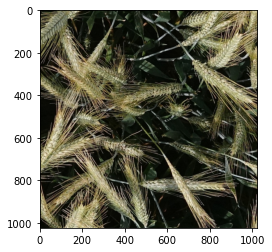

In [46]:
plt.imshow(img)

Check duplicate image names to see if they are also duplicated images:

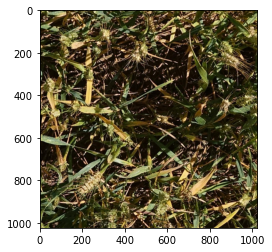

In [47]:
plt.imshow(plt.imread('gwhd_2021/images/d88963636d49127bda0597ef73f1703e92d6f111caefc44902d5932b8cd3fa94.jpg'))

In [48]:
#create data directory path and count images
data_dir = pathlib.Path('gwhd_2021/images')

Double-check that length of label csvs (train/test/val) matches total number of images:

In [49]:
len(list(data_dir.glob('*.jpg')))

6515

In [50]:
len(train) + len(test) + len(val)

6515

Great. Lengths match. Now let's check lengths of each set of labels to determine splits in image folder:

In [51]:
print('Length of training data is: {}'.format(len(train)))
print('Length of test data is: {}'.format(len(test)))
print('Length of val data is: {}'.format(len(val)))
print('Total length of all data is: {}'.format(len(list(data_dir.glob('*.jpg')))))

Length of training data is: 3657
Length of test data is: 1382
Length of val data is: 1476
Total length of all data is: 6515
